In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
from collections import Counter
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd


In [2]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,classification_report,confusion_matrix
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

In [3]:
import nglview as nv

Analalysis for alpha_synuclein(SNCA)

In [4]:
for record in SeqIO.parse('alpha_synclein.fasta','fasta'):
    alpha_syn_record = record
    alpha_syn_dna = record.seq
print(alpha_syn_record)

ID: AF163864.1
Name: AF163864.1
Description: AF163864.1 Homo sapiens SNCA isoform (SNCA) gene, complete cds, alternatively spliced
Number of features: 0
Seq('AATTTTCCTTGAAAAACATAGATGTCCAGTTCTATCTCTCATATTTTTTCTTTT...TAG', SingleLetterAlphabet())


In [5]:
len(alpha_syn_dna)

145606

In [6]:
#counting the starting codon ATG
alpha_syn_dna.count('ATG')

2871

In [7]:
mrna_alpha = alpha_syn_dna.transcribe()
mrna_alpha

Seq('AAUUUUCCUUGAAAAACAUAGAUGUCCAGUUCUAUCUCUCAUAUUUUUUCUUUU...UAG', RNAAlphabet())

In [8]:
protein_alpha = mrna_alpha.translate()
## * here is a stop codon

len(protein_alpha),protein_alpha

C:\Users\kunjk\kunj\lib\site-packages\Bio\Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


(48535,
 Seq('NFP*KT*MSSSISHIFSFHRDMAL*D*FKLQTAEKCKITVA*MK*KYFIS*KSS...SEL', HasStopCodon(ExtendedIUPACProtein(), '*')))

In [9]:
#codons are of 3 and above we are getting 48535 proteins this column is just to double check 
len(alpha_syn_dna)/3

48535.333333333336

In [10]:
#finding all amino acids sequence before stop codon
alpha_aa = protein_alpha.split('*')
alpha_aa

[Seq('NFP', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('KT', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('MSSSISHIFSFHRDMAL', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('D', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('FKLQTAEKCKITVA', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('MK', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('KYFIS', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('KSSDKDSQMLEGQLCSRRFSRSQATSNPLLCHL', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('FMSYVLRVHNGSKNAPHHICVSNSRMERKRRKGGIKEGSRSCHLTLLLTFNWPK...HKL', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('EMLENLFVSTLHGHYQSISQQRGLCNNSKK', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('EWTQT', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('SFTFQ', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('K', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('KCYINIYSLSLSLSLSLSFLVLTIKFS', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('I', HasStopCodon(ExtendedIUPACProtein(), '*')),

In [11]:
alpha_aa_string = [str(i) for i in alpha_aa]
alpha_aa_string

['NFP',
 'KT',
 'MSSSISHIFSFHRDMAL',
 'D',
 'FKLQTAEKCKITVA',
 'MK',
 'KYFIS',
 'KSSDKDSQMLEGQLCSRRFSRSQATSNPLLCHL',
 'FMSYVLRVHNGSKNAPHHICVSNSRMERKRRKGGIKEGSRSCHLTLLLTFNWPKFNLISHKL',
 'EMLENLFVSTLHGHYQSISQQRGLCNNSKK',
 'EWTQT',
 'SFTFQ',
 'K',
 'KCYINIYSLSLSLSLSLSFLVLTIKFS',
 'I',
 'LKLKSRKMHYTLLLW',
 'LEW',
 'NVWIIFTPSIICF',
 'PYIF',
 'KLLQGLLNDQSIKAHFFLSWQKHSFDKFDKFL',
 'ICNLFDLIKFSSCFHNELLKIKSKALNRKILNLNFLG',
 'TTYTFHFQFTNRINTSFH',
 'I',
 'AIHTKSP',
 'PNAMSLGI',
 'SNL',
 'IMFCLIVHKILQPAYLEKHFVHDMYIYEACIWINTYKVVKIRQILYFRPLLKLSFFKNKI',
 'NANF',
 'NKCAIVAQYVNIGENCMENIQKCFILYNSFVHPILFQKLKVLNMFSLEMYQKCLSKVLLVLRLIY',
 '',
 'YYTQKDRR',
 'K',
 'S',
 'FEYDCHFKSLTFNFTNFISSWPISLPNLNTWLHAAGKVHGRTIEISRSHCVSGNDKVPQRLLTCVRPT',
 'GNHILRS',
 'RVICGLERQVSRKKCLSQQFMKMLKKKKN',
 'VSFP',
 'NPSFGLPFKIFSIKAATFFPDAQDKTLNTEMHDFVAEIPVCCLHSALLSIAPSSSACSQSPPLIATYTIYPMKHHQIIPAHTSISGPSLVHCTLSFPQSLWKEWHSSWRGTQGTEHLSPPNSCGAVDLRWYHEGNMDS',
 'DHMQEPRHTAQAPRVSDSV',
 'LAGNPALALCST',
 'VGHPKRHFSVVLPTKSCKEIPLHSVRSDPLARL

In [12]:
#converting amino acids in to pandas
amino = pd.DataFrame({'amino_acids':alpha_aa_string})
amino.head()

,amino_acids
0,NFP
1,KT
2,MSSSISHIFSFHRDMAL
3,D
4,FKLQTAEKCKITVA


In [13]:
amino['count'] = amino['amino_acids'].str.len()
amino.head()

,amino_acids,count
0,NFP,3
1,KT,2
2,MSSSISHIFSFHRDMAL,17
3,D,1
4,FKLQTAEKCKITVA,14


In [14]:
#largest sequence before stop codon
amino.nlargest(10,'count') 

,amino_acids,count
522,GVVPGRTQRKGGDKKGGEGERGRGIIPSPTAPDLHKSARDPKLNVR...,238
1916,VCREKGTLVHCWWKYRLVQSLWTIVRRFLKKLKLELPKTQQSLLWM...,144
37,NPSFGLPFKIFSIKAATFFPDAQDKTLNTEMHDFVAEIPVCCLHSA...,138
2269,AHKTTSKKAFYHLQESIYIYLLLCIYIYIYISAFVYIYIHTHTHIC...,136
858,NWSHSSHLWYSQSPYFFSFFLSFSFSFFLSFFLSFLSFFTFFPFFL...,124
2713,FGYVLFLTALLKGMSRMGTAVHTCNPALCEPKWPGYLRPGVGDQSG...,124
2632,SNSNSDHVGLFFFCFLFLFIYLFIYFETESHSVTRLECNGVIWAHC...,120
97,IFSQRISCMVVYVWGNTHPGTQLYRVGHVLHTSVCLSSCLPSPLNP...,117
269,ARDIVPYIPAAPAMAERGQCRAWVMASEGASPKPWQLPHGVEIASA...,108
1256,SQHFGKSRPSDHLRPGVRDQPGQHGEILSLLKIQKKKKKERKERKN...,108


In [15]:
#finding the most common amino acids with the frequency available in the sequence
Counter(protein_alpha).most_common(10)

[('L', 5585),
 ('S', 4213),
 ('I', 3507),
 ('F', 3236),
 ('K', 2972),
 ('*', 2886),
 ('V', 2584),
 ('T', 2340),
 ('N', 2253),
 ('R', 2052)]

In [16]:
parser = PDBParser()
structure = parser.get_structure('mmdb_6L1U','mmdb_6L1U.pdb')

In [17]:
len(structure)

1

In [18]:
model = structure[0]
for chain in model:
    print(chain)

<Chain id=A>
<Chain id=B>
<Chain id=C>
<Chain id=D>
<Chain id=E>
<Chain id=F>
<Chain id=G>
<Chain id=H>
<Chain id=I>
<Chain id=J>
<Chain id=K>
<Chain id=L>
<Chain id=M>
<Chain id=N>
<Chain id=O>


In [19]:
#SNCA 3d structure
view = nv.show_biopython(structure)

In [20]:
view

NGLWidget()

In [21]:
amino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887 entries, 0 to 2886
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   amino_acids  2887 non-null   object
 1   count        2887 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.2+ KB


In [22]:
amino.isnull().sum()

amino_acids    0
count          0
dtype: int64

C:\Users\kunjk\kunj\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


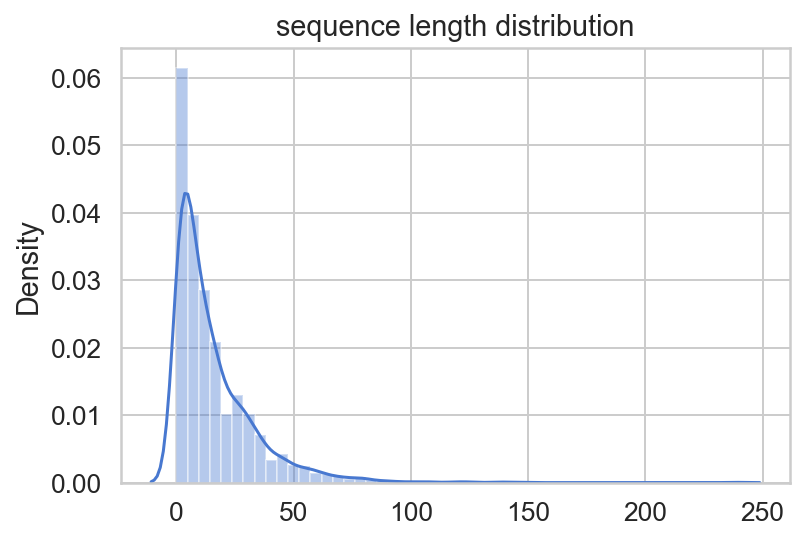

In [23]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid',palette='muted',font_scale=1.2)
ax = sns.distplot(amino['count'].values)
plt.title(f'sequence length distribution')
plt.grid(True) 
#mostly data covered with in the range of 40

Analysis for PARKIN(PARK2)

In [24]:
amino.to_csv('amino_alpha.csv',sep=',')